Displaying results from model trained on version 1 with augmentation:

image 1/1 /Users/lanran/PycharmProjects/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/carbon-steel-good-welds_28_png_jpg.rf.0d13b8fd981d7a68d163528d61a2e534.jpg: 640x640 1 cake, 70.0ms
Speed: 1.1ms preprocess, 70.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


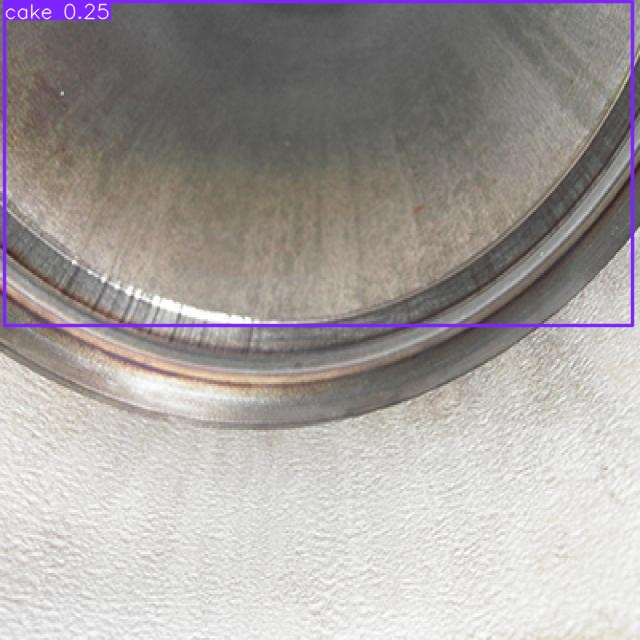


image 1/1 /Users/lanran/PycharmProjects/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/02fd0af7-51ab46bb-c13_jpg.rf.7de08cd3b264d9098d09f5fe6d21c959.jpg: 640x640 (no detections), 50.3ms
Speed: 1.0ms preprocess, 50.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


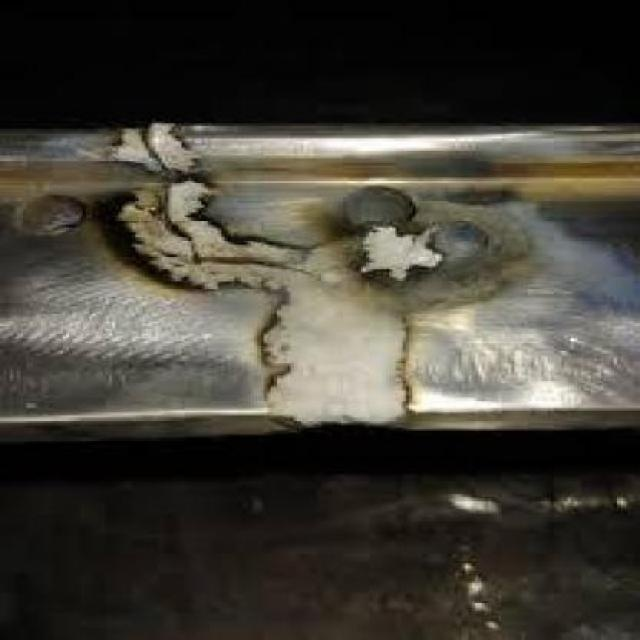


image 1/1 /Users/lanran/PycharmProjects/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/SampleV2_1_mp4-59_jpg.rf.b500f4a89177615c16be765f9f15b910.jpg: 640x640 (no detections), 58.6ms
Speed: 0.8ms preprocess, 58.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


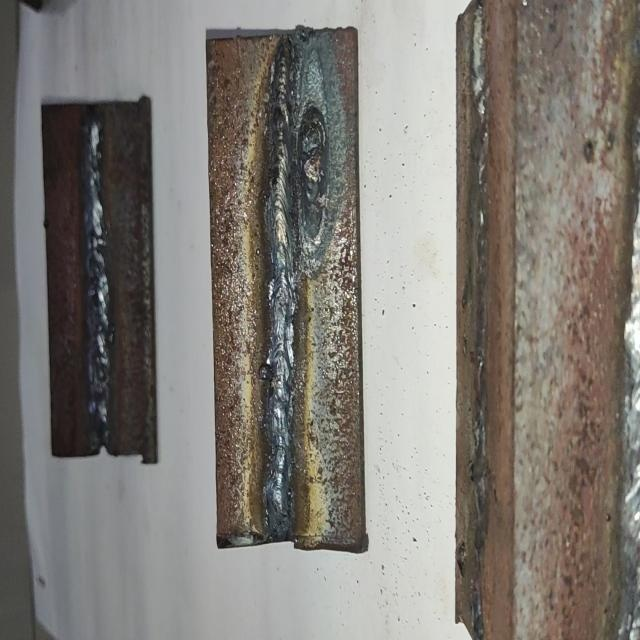


image 1/1 /Users/lanran/PycharmProjects/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/good_weld_vid529_jpeg_jpg.rf.4dc697dcd18f7c7de001311bb1f845e6.jpg: 640x640 (no detections), 59.4ms
Speed: 0.9ms preprocess, 59.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


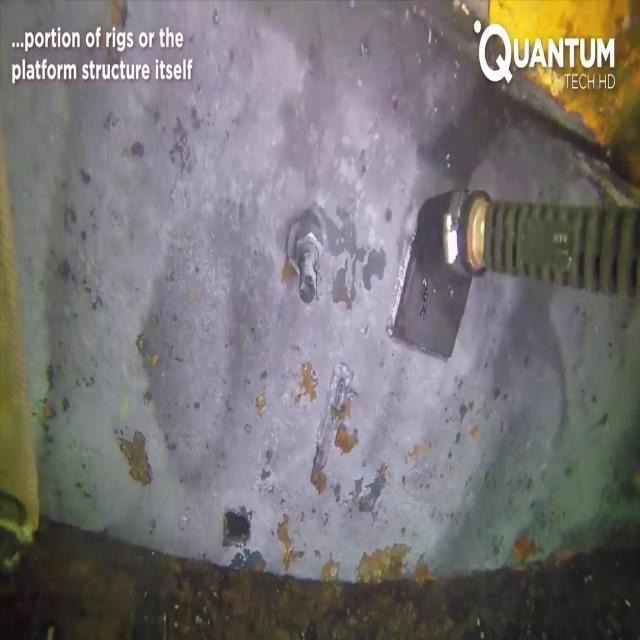


image 1/1 /Users/lanran/PycharmProjects/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset/The Welding Defect Dataset/test/images/bad_weld_vid233_jpeg_jpg.rf.17d61563d86c4d1fc157c29f5a109d98.jpg: 640x640 (no detections), 56.6ms
Speed: 0.8ms preprocess, 56.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


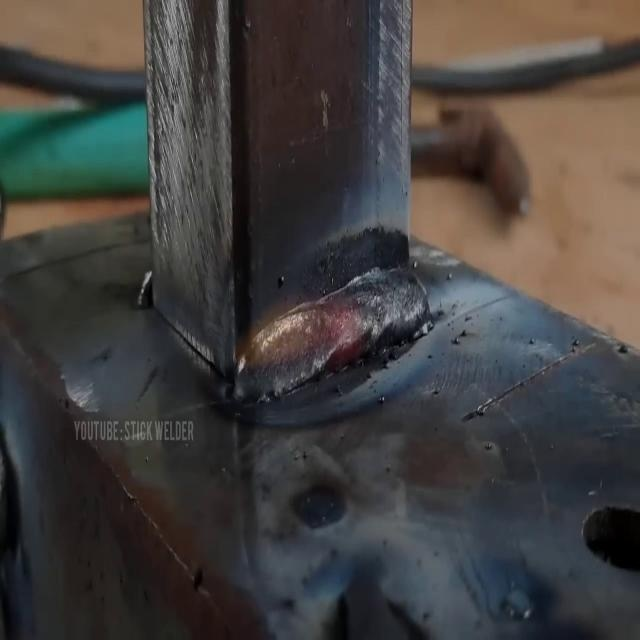

Displaying results from model trained on version 2 with augmentation:

image 1/1 /Users/lanran/PycharmProjects/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/SampleV2_2_mp4-100_jpg.rf.95c9ff940b64d347919b6d49dfb8b0b3.jpg: 640x640 (no detections), 51.8ms
Speed: 2.0ms preprocess, 51.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


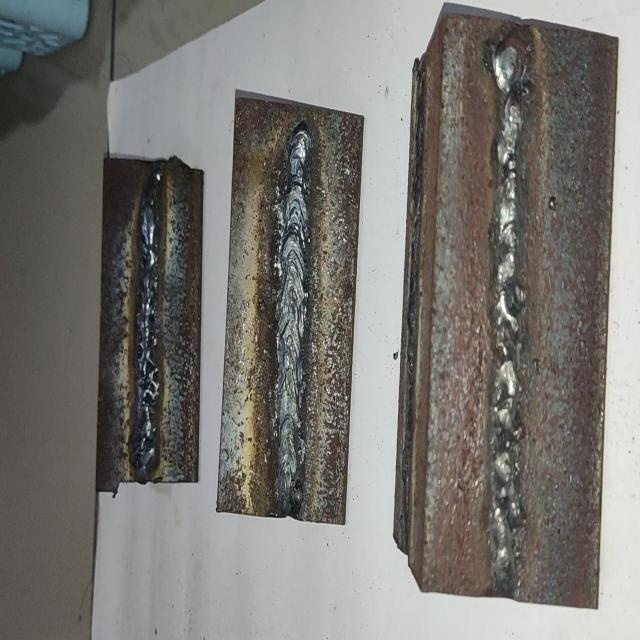


image 1/1 /Users/lanran/PycharmProjects/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/poor-Welding-Images_52_jpeg.rf.c581b9cc8ce08cae3120e82b201d0efb.jpg: 640x640 (no detections), 63.6ms
Speed: 1.1ms preprocess, 63.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


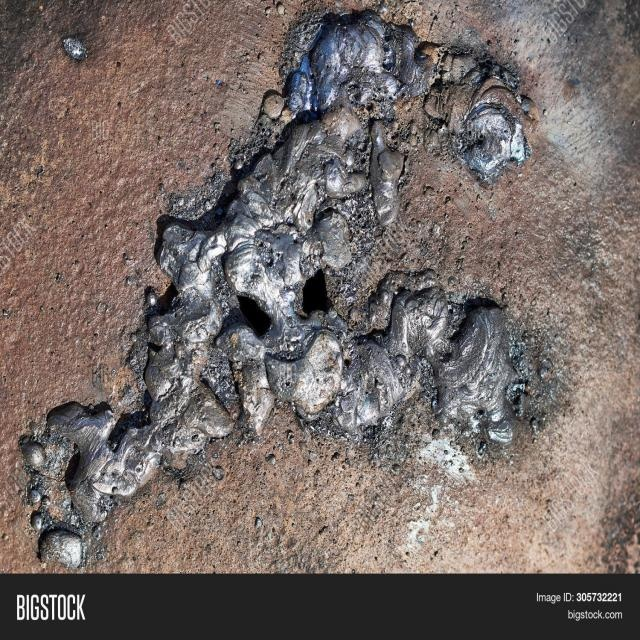


image 1/1 /Users/lanran/PycharmProjects/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/Slag-inclusion-welding-images_11_jpeg.rf.06f53c90b96f942c575dad2d8ba10992.jpg: 640x640 (no detections), 58.7ms
Speed: 1.0ms preprocess, 58.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


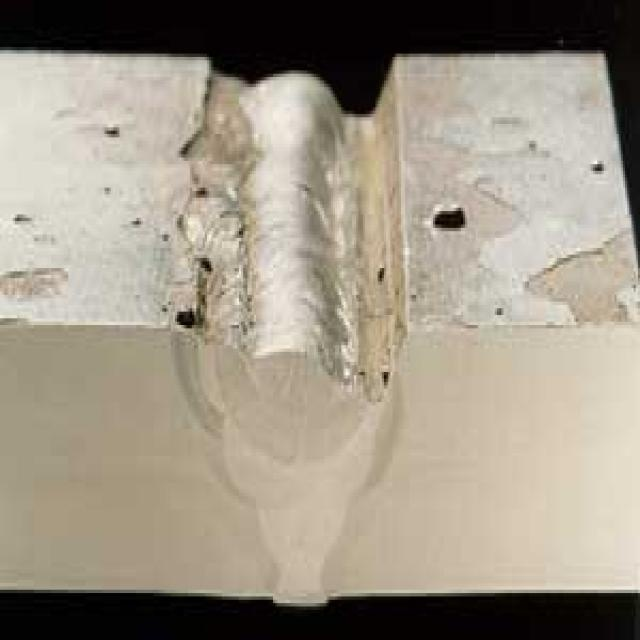


image 1/1 /Users/lanran/PycharmProjects/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/istockphoto-1141599875-612x612_jpeg.rf.4e91c0a0fd5238a855a277f1d3bf0c0f.jpg: 640x640 (no detections), 53.2ms
Speed: 1.2ms preprocess, 53.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


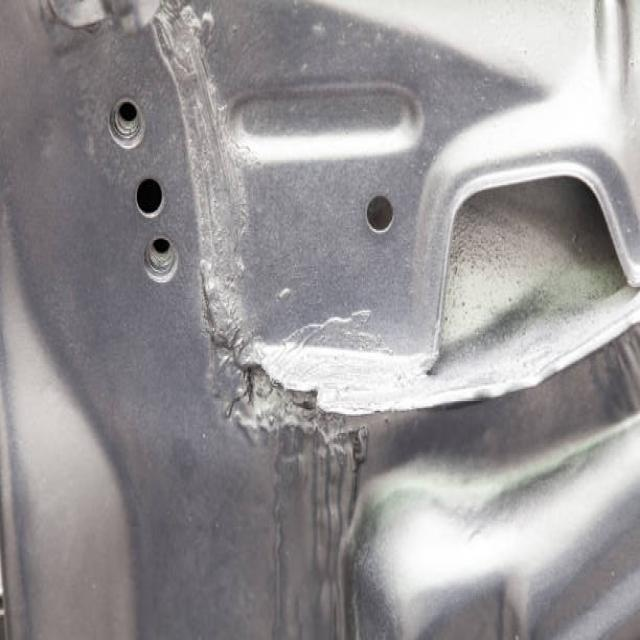


image 1/1 /Users/lanran/PycharmProjects/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/test/images/good_weld_vid469_jpeg.rf.bb8d4104e49f8bd79aef34b7ed48b49f.jpg: 640x640 (no detections), 65.0ms
Speed: 8.3ms preprocess, 65.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


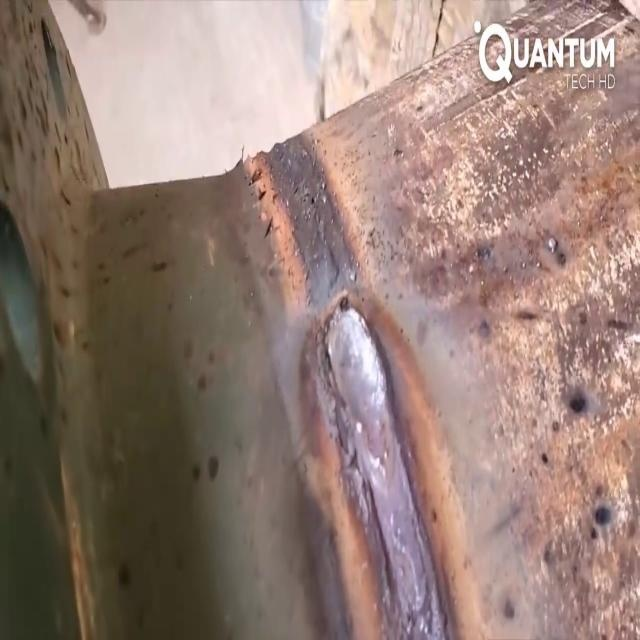

In [2]:
import os

import random
from IPython.display import Image, display
from ultralytics import YOLO

model_path = 'working/yolov8n.pt'
model = YOLO(model_path)



# Evaluate the model and display results
def display_results(model, img_dir, num_images=5):
    images = os.listdir(img_dir)
    sample_images = random.sample(images, num_images)
    save_dir = 'runs/detect/exp'
    os.makedirs(save_dir, exist_ok=True)

    for image_name in sample_images:
        image_path = os.path.join(img_dir, image_name)
        results = model(image_path)
        for result in results:
            result.plot(save=True, filename=os.path.join(save_dir, os.path.basename(result.path)))
            result_image_path = os.path.join(save_dir, os.path.basename(result.path))
            display(Image(filename=result_image_path))

# Define paths
root_dir = 'input/welding-defect-object-detection'
v1_dir = os.path.join(root_dir, 'The Welding Defect Dataset/The Welding Defect Dataset')
v2_dir = os.path.join(root_dir, 'The Welding Defect Dataset - v2/The Welding Defect Dataset - v2')

print("Displaying results from model trained on version 1 with augmentation:")
display_results(model, os.path.join(v1_dir, 'test/images'))

print("Displaying results from model trained on version 2 with augmentation:")
display_results(model, os.path.join(v2_dir, 'test/images'))